In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('housing.csv')

In [89]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [90]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [91]:
from sklearn.impute import SimpleImputer

In [92]:
imputer=SimpleImputer(strategy='mean')

In [93]:
df['total_bedrooms']=imputer.fit_transform(df['total_bedrooms'].values.reshape(-1,1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F8DEF4668>,
      dtype=object)

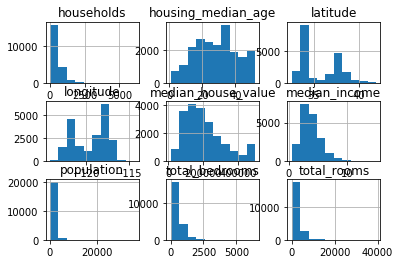

In [94]:
df.hist()

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
le=LabelEncoder()

In [97]:
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss=StandardScaler()

In [21]:
cols=df.columns

In [24]:
for m in cols:
    df[m]=ss.fit_transform(df[m].values.reshape(-1,1))

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,1.291089


In [26]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.014688
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,0.081750,1.000000


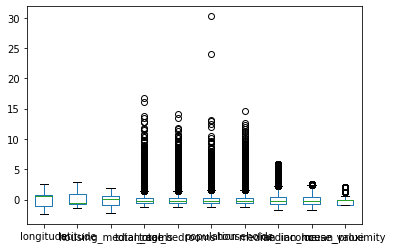

In [27]:
df.plot.box()

In [30]:
df.shape

(20640, 10)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [98]:
x=df.iloc[:,0:11]

In [99]:
x.drop('median_house_value',inplace=True,axis=1)

In [100]:
y=df.iloc[:,-2].values.reshape(-1,1)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [103]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
cv=cross_val_score(lr,x,y,cv=15,scoring='r2')

In [106]:
cv.mean()

0.5246553319516765

In [107]:
x.drop('longitude',inplace=True,axis=1)

In [108]:
x.drop('latitude',inplace=True,axis=1)

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rfr=RandomForestRegressor(n_estimators=200)

In [117]:
cv=cross_val_score(rfr,x,y,cv=15,scoring='r2')

In [118]:
cv.mean()

0.5704682021553197

In [119]:
cv.std()

0.12380709036352379

In [120]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [121]:
rfr.score(xtrain,ytrain)

0.9743375807138784